In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pathdata = '/home/daniu/Documentos/fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/Users/danielarisaro/Documents/fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/'

filename = 'data_input/canastas_basicas/canasta-basica-total-regiones-del-pais.csv'

In [3]:
df = pd.read_csv(pathdata + filename)

df.index = pd.to_datetime(df['indice_tiempo'])
df = df.drop(['indice_tiempo'], axis=1)

In [4]:
df_rolling = df.rolling(window=3, center=True).mean()

<AxesSubplot:xlabel='indice_tiempo'>

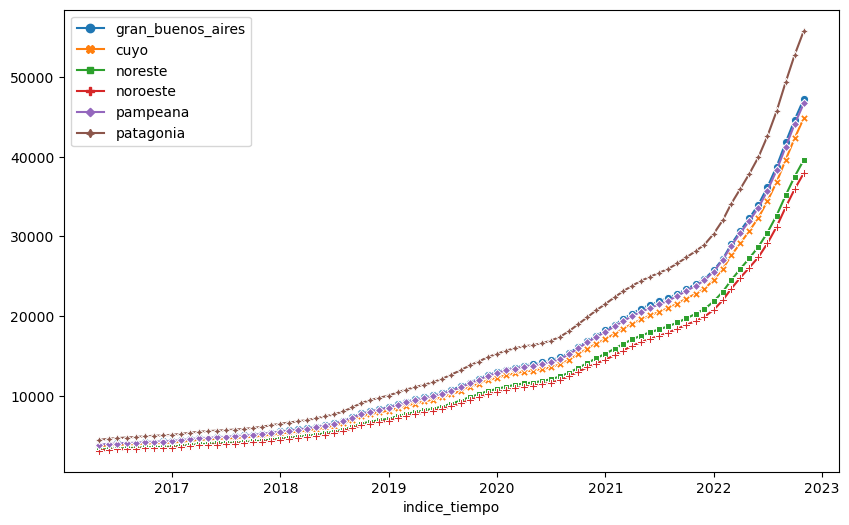

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rolling, markers=True, dashes=False)

In [5]:
df_CBT = df_rolling.loc[df_rolling.index.month.isin([1,4,7,10])]

In [6]:
df_CBT

,gran_buenos_aires,cuyo,noreste,noroeste,pampeana,patagonia
indice_tiempo,,,,,,
2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,4002.896667,3819.050000,3368.596667,3253.106667,3988.143333,4679.366667
2016-10-01,4176.540000,3987.670000,3505.090000,3380.823333,4158.266667,4894.530000
2017-01-01,4331.493333,4121.120000,3613.526667,3474.463333,4303.066667,5085.093333
2017-04-01,4666.393333,4438.050000,3890.443333,3747.186667,4625.410000,5457.543333
2017-07-01,4863.076667,4623.910000,4052.873333,3919.796667,4823.010000,5672.296667
2017-10-01,5086.960000,4846.193333,4251.056667,4122.796667,5063.836667,5938.636667
2018-01-01,5522.023333,5259.753333,4612.240000,4463.286667,5502.026667,6479.796667
2018-04-01,5928.683333,5616.936667,4941.543333,4766.540000,5869.753333,6928.290000


In [7]:
# Define the mapping dictionary
mapping = {
    1: lambda x: f'1T{x.year}',
    4: lambda x: f'2T{x.year}',
    7: lambda x: f'3T{x.year}',
    10: lambda x: f'4T{x.year}'
}

# Add a new column with the renamed values
df_CBT.loc[:, 'Trimestre'] = df_CBT.index.map(lambda x: mapping.get(x.month, lambda x: x)(x))
df_CBT = df_CBT.dropna()

In [8]:
df_CBT

,gran_buenos_aires,cuyo,noreste,noroeste,pampeana,patagonia,Trimestre
indice_tiempo,,,,,,,
2016-07-01,4002.896667,3819.050000,3368.596667,3253.106667,3988.143333,4679.366667,3T2016
2016-10-01,4176.540000,3987.670000,3505.090000,3380.823333,4158.266667,4894.530000,4T2016
2017-01-01,4331.493333,4121.120000,3613.526667,3474.463333,4303.066667,5085.093333,1T2017
2017-04-01,4666.393333,4438.050000,3890.443333,3747.186667,4625.410000,5457.543333,2T2017
2017-07-01,4863.076667,4623.910000,4052.873333,3919.796667,4823.010000,5672.296667,3T2017
2017-10-01,5086.960000,4846.193333,4251.056667,4122.796667,5063.836667,5938.636667,4T2017
2018-01-01,5522.023333,5259.753333,4612.240000,4463.286667,5502.026667,6479.796667,1T2018
2018-04-01,5928.683333,5616.936667,4941.543333,4766.540000,5869.753333,6928.290000,2T2018
2018-07-01,6537.736667,6229.246667,5465.146667,5284.830000,6481.306667,7649.350000,3T2018


In [9]:
df_CBT.to_csv('/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/data_output/Canasta_Basica_Total_Regiones_2016-2022-promedios-moviles.csv')

<AxesSubplot:xlabel='indice_tiempo'>

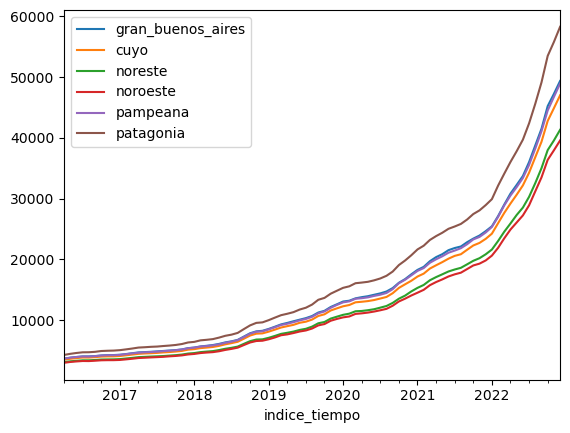

In [10]:
df.plot()